<a href="https://colab.research.google.com/github/Aleksanderprofic/Machine-Learning/blob/master/Regression/regression_model_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression model selection

### Selecting the best model for particular problem out of all available regression models:
* Linear Regression, 
* Polynomial Regression, 
* Support Vector Regression,
* Decision Trees,
* Random Forests


## Data loading and visualisation

### Data loading

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset = pd.read_csv('Data.csv')
dataset.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### Data Visualisation

Taking smaller sample size than the whole dataset to make visualisation clearer

In [5]:
smaller_dataset = dataset.sample(frac=0.3)

#### AT vs PE

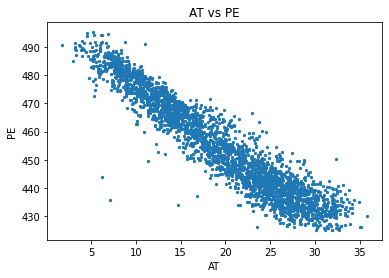

In [6]:
plt.scatter(smaller_dataset.AT, smaller_dataset.PE, s=5)
plt.title('AT vs PE')
plt.xlabel('AT')
plt.ylabel('PE')
plt.show()

In [7]:
smaller_dataset.AT.corr(dataset.PE)

-0.9476760089275484

Strong negative correlation between AT and PE

#### V vs PE

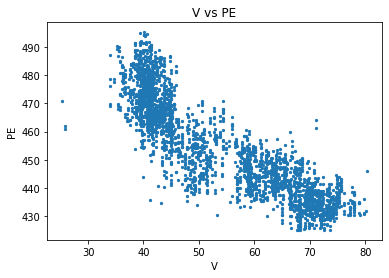

In [8]:
plt.scatter(smaller_dataset.V, smaller_dataset.PE, s=5)
plt.title('V vs PE')
plt.xlabel('V')
plt.ylabel('PE')
plt.show()

In [9]:
smaller_dataset.V.corr(dataset.PE)

-0.8717945319561148

Strong negative correlation between V and PE

#### AP vs PE

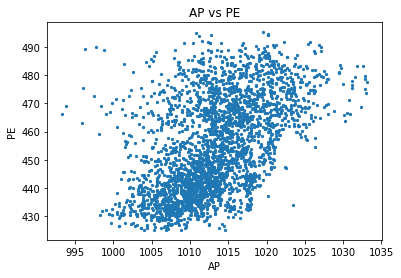

In [10]:
plt.scatter(smaller_dataset.AP, smaller_dataset.PE, s=5)
plt.title('AP vs PE')
plt.xlabel('AP')
plt.ylabel('PE')
plt.show()

In [11]:
smaller_dataset.AP.corr(smaller_dataset.PE)

0.5077063970843874

There is some positive correlation between AP and PE

#### RH vs PE

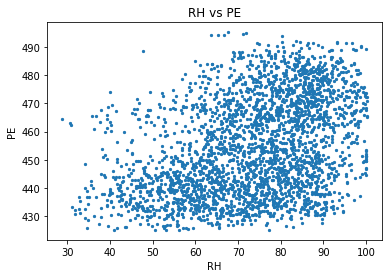

In [12]:
plt.scatter(smaller_dataset.RH, smaller_dataset.PE, s=5)
plt.title('RH vs PE')
plt.xlabel('RH')
plt.ylabel('PE')
plt.show()

In [13]:
smaller_dataset.RH.corr(smaller_dataset.PE)

0.3866817988693465

There is a weak correlation between RH and PE

## Data preprocessing

### Extracting dependent and independent variables

In [14]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Splitting dataset into the Training Set and the Test Set 

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training and predictions

### Multiple Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

lin_regressor = LinearRegression()
lin_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
lin_y_pred = lin_regressor.predict(X_test)
lin_y_pred

array([431.42761597, 458.56124622, 462.75264705, ..., 469.51835895,
       442.41759454, 461.88279939])

In [18]:
np.set_printoptions(precision=2)

print(np.concatenate((lin_y_pred.reshape(-1, 1), y_test.reshape(-1, 1)), 1))

[[431.43 431.23]
 [458.56 460.01]
 [462.75 461.14]
 ...
 [469.52 473.26]
 [442.42 438.  ]
 [461.88 463.28]]


### Polynomial Regression

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=4)
X_reg = poly_reg.fit_transform(X_train)

poly_regressor = LinearRegression()
poly_regressor.fit(X_reg, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
poly_y_pred = poly_regressor.predict(poly_reg.transform(X_test))
poly_y_pred

array([433.94, 457.9 , 460.52, ..., 469.53, 438.27, 461.66])

In [21]:
print(np.concatenate((poly_y_pred.reshape(-1, 1), y_test.reshape(-1, 1)), 1))

[[433.94 431.23]
 [457.9  460.01]
 [460.52 461.14]
 ...
 [469.53 473.26]
 [438.27 438.  ]
 [461.66 463.28]]


### Support Vector Regression

#### Feature scaling

In [22]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()

X_scaled = sc_X.fit_transform(X_train)
y_scaled = sc_y.fit_transform(y_train.reshape(-1, 1))

#### Training

In [23]:
from sklearn.svm import SVR

svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_scaled, y_scaled)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [24]:
svr_y_pred = sc_y.inverse_transform(svr_regressor.predict(sc_X.transform(X_test)))
svr_y_pred

array([434.05, 457.94, 461.03, ..., 470.6 , 439.42, 460.92])

In [25]:
print(np.concatenate((svr_y_pred.reshape(-1, 1), y_test.reshape(-1, 1)), 1))

[[434.05 431.23]
 [457.94 460.01]
 [461.03 461.14]
 ...
 [470.6  473.26]
 [439.42 438.  ]
 [460.92 463.28]]


### Decision Tree Regression

In [26]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [27]:
tree_y_pred = tree_regressor.predict(X_test)
tree_y_pred

array([430.46, 459.59, 460.06, ..., 470.31, 437.76, 462.55])

In [28]:
print(np.concatenate((tree_y_pred.reshape(-1, 1), y_test.reshape(-1, 1)), 1))

[[430.46 431.23]
 [459.59 460.01]
 [460.06 461.14]
 ...
 [470.31 473.26]
 [437.76 438.  ]
 [462.55 463.28]]


### Random Forest Regression

In [29]:
from sklearn.ensemble import RandomForestRegressor

forest_regressor = RandomForestRegressor(n_estimators=10)
forest_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [30]:
forest_y_pred = forest_regressor.predict(X_test)
forest_y_pred

array([433.56, 456.79, 463.42, ..., 469.22, 438.53, 462.09])

In [31]:
print(np.concatenate((forest_y_pred.reshape(-1, 1), y_test.reshape(-1, 1)), 1))

[[433.56 431.23]
 [456.79 460.01]
 [463.42 461.14]
 ...
 [469.22 473.26]
 [438.53 438.  ]
 [462.09 463.28]]


## Evaluating Models performance with R-squared

### Multiple Linear Regression

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test, lin_y_pred)

0.9325315554761302

### Polynomial Regression

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test, poly_y_pred)

0.9458192606428147

### Support Vector Regression

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test, svr_y_pred)

0.9480784049986258

### Decision Tree Regression

In [35]:
from sklearn.metrics import r2_score
r2_score(y_test, tree_y_pred)

0.9213357421643555

### Random Forest Regression

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test, forest_y_pred)

0.9614236726615679

The best regression model for this problem seems to be Random Forest Regression because its R-squared score is closest to 1